In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from qiskit import Aer

In [8]:
dataset = pd.read_excel('POBLACION_MEDELLIN_1993_A_2O20.xlsx', engine='openpyxl')
X_train, X_test = train_test_split(dataset, train_size=0.9)
X_train

Hombres 1993  Mujeres 1993  Hombres 2005  Mujeres 2005  Hombres 2006  \
209           160           161           116           120           122   
166          1478          1595          1617          1871          1568   
211           114           113           120           123           115   
85           9890          9279          7362          7063          7218   
198          1936          2173          2872          3498          2991   
..            ...           ...           ...           ...           ...   
48           1258          1870          1937          2974          1830   
2             587           579          1470          1441          1490   
350          1890          2117          3155          3837          3231   
284           203           206           320           362           391   
153          2198          2062          1839          1765          1843   

     Mujeres 2006  Hombres 2007  Mujeres 2007  Hombres 2008  Mujeres 2008  \
209           127           128           132           141           145   
166          1813          1522          1760          1493          1723   
211           119           111           115           113           119   
85           6922          7087          6807          6982          6704   
198          3650          3090          3772          3183          3895   
..            ...           ...           ...           ...           ...   
48           2860          1878          2944          1933          3031   
2            1462          1505          1477          1519          1491   
350          3953          3308          4080          3390          4217   
284           445           470           538           539           617   
153          1768          1846          1768          1839          1761   

     ...  Hombres 2016  Mujeres 2016  Hombres 2017  Mujeres 2017  \
209  ...           297           314           316           330   
166  ...          2245          2619          2352          2745   
211  ...           189           209           203           227   
85   ...          6590          6276          6507          6207   
198  ...          4816          6148          4978          6315   
..   ...           ...           ...           ...           ...   
48   ...          2585          3836          2768          4125   
2    ...          1765          1720          1792          1746   
350  ...          3904          4894          3855          4839   
284  ...           728          1020           785          1116   
153  ...          1622          1547          1593          1518   

     Hombres 2018  Mujeres 2018  Hombres 2019  Mujeres_2019  Hombres 2020  \
209           333           349           349           368           366   
166          2452          2858          2522          2943          2595   
211           220           244           237           264           252   
85           6397          6112          6361          6087          6240   
198          5107          6436          5159          6466          5213   
..            ...           ...           ...           ...           ...   
48           2968          4483          3150          4730          3306   
2            1818          1774          1853          1811          1891   
350          3783          4743          3645          4597          3522   
284           838          1211           884          1299           923   
153          1555          1482          1538          1468          1491   

     Mujeres 2020  
209           385  
166          3042  
211           281  
85           5977  
198          6496  
..            ...  
48           4997  
2            1852  
350          4451  
284          1383  
153          1421  

[321 rows x 34 columns]

In [9]:
import sys
sys.path.append("..")

from quantum_k_means_1 import *

provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')
qkmeans_instances = [QuantumKMeans(backend=backend, n_clusters=i, init='qk-means++', verbose=True, map_type='probability', tol=0.01).fit(X_train, batch=True) for i in range(2,11)]

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-06-10 02:36:46,196: Credentials are already in use. The existing account in the session will be replaced.


Data is:            0         1         2         3         4         5         6   \
0    0.112544  0.113247  0.081594  0.084408  0.085815  0.089332  0.090035   
1    0.120835  0.130401  0.132200  0.152966  0.128194  0.148224  0.124433   
2    0.115494  0.114481  0.121573  0.124612  0.116507  0.120560  0.112455   
3    0.248435  0.233087  0.184932  0.177422  0.181315  0.173880  0.178024   
4    0.072418  0.081283  0.107430  0.130847  0.111882  0.136532  0.115585   
..        ...       ...       ...       ...       ...       ...       ...   
316  0.072460  0.107711  0.111570  0.171300  0.105407  0.164734  0.108172   
317  0.061848  0.061005  0.154883  0.151827  0.156990  0.154040  0.158570   
318  0.080743  0.090440  0.134785  0.163921  0.138032  0.168876  0.141321   
319  0.045048  0.045714  0.071011  0.080332  0.086767  0.098750  0.104298   
320  0.221720  0.208001  0.185506  0.178042  0.185910  0.178344  0.186213   

           7         8         9   ...        24        25        

Old centroids are          0         1         2         3         4         5         6   \
0  0.123589  0.126350  0.147556  0.162211  0.149156  0.164169  0.150941   
1  0.065384  0.083286  0.107526  0.159148  0.110975  0.164363  0.115967   

         7         8         9   ...        24        25        26        27  \
0  0.166315  0.153185  0.168966  ...  0.172786  0.192535  0.175357  0.195527   
1  0.171700  0.121751  0.180886  ...  0.132393  0.233278  0.136265  0.241454   

         28        29        30        31        32        33  
0  0.177930  0.198507  0.180194  0.201733  0.182532  0.204697  
1  0.139964  0.250071  0.142751  0.258206  0.146279  0.266764  

[2 rows x 34 columns]
New centroids are          0         1         2         3         4         5         6   \
0  0.125925  0.127938  0.148692  0.162086  0.150248  0.163944  0.151931   
1  0.067813  0.085525  0.110692  0.160038  0.113968  0.165016  0.118736   

         7         8         9   ...        24        25

Cluster center 1
Centers are: [[ 8.12386677e-002  9.47277348e-002  1.15772708e-001  1.46554151e-001
   1.22060845e-001  1.54414322e-001  1.27639030e-001  1.61260277e-001
   1.32862241e-001  1.67751256e-001  1.38541848e-001  1.74901476e-001
   1.44880695e-001  1.83420887e-001  1.49444665e-001  1.89861156e-001
   1.53653660e-001  1.95997160e-001  1.57710522e-001  2.01727478e-001
   1.61158855e-001  2.06291448e-001  1.64100080e-001  2.09689070e-001
   1.67801967e-001  2.14253041e-001  1.72112383e-001  2.18614167e-001
   1.75763559e-001  2.22062500e-001  1.76524221e-001  2.22366765e-001
   1.76524221e-001  2.22366765e-001]
 [ 5.72465768e-002  5.72465768e-002  7.15582210e-002  7.00517322e-002
   7.90906653e-002  7.98439098e-002  8.58698652e-002  8.88828430e-002
   9.79217761e-002  1.03947732e-001  1.06960709e-001  1.15246398e-001
   1.12986665e-001  1.24285331e-001  1.26545065e-001  1.41609953e-001
   1.40103464e-001  1.56674842e-001  1.55921597e-001  1.73999464e-001
   1.70233242e-001  1.9

Old centroids are          0         1         2         3         4         5         6   \
0  0.085282  0.098127  0.125312  0.158057  0.127790  0.161457  0.131136   
1  0.153846  0.149569  0.163374  0.164829  0.163993  0.165196  0.164484   
2  0.057757  0.072509  0.102509  0.160977  0.107835  0.169423  0.114104   

         7         8         9   ...        24        25        26        27  \
0  0.166010  0.134908  0.171260  ...  0.162441  0.212662  0.166450  0.218325   
1  0.165382  0.165569  0.166200  ...  0.177768  0.177212  0.179149  0.178491   
2  0.178846  0.121069  0.189995  ...  0.115389  0.238986  0.118701  0.246817   

         28        29        30        31        32        33  
0  0.170503  0.223992  0.173084  0.228838  0.176727  0.234577  
1  0.180528  0.179751  0.182730  0.182231  0.184261  0.183807  
2  0.121456  0.255524  0.123432  0.263956  0.125249  0.270651  

[3 rows x 34 columns]
New centroids are          0         1         2         3         4         5   

Cluster center 1
Centers are: [[ 1.10508662e-001  1.25468967e-001  1.72372813e-001  2.16736231e-001
   1.75101422e-001  2.18806210e-001  1.75289602e-001  2.17771221e-001
   1.73548938e-001  2.14478072e-001  1.70114654e-001  2.09538349e-001
   1.65033796e-001  2.03375456e-001  1.58447499e-001  1.95330765e-001
   1.51061437e-001  1.87050848e-001  1.43628330e-001  1.78912066e-001
   1.36994987e-001  1.71620094e-001  1.32196399e-001  1.66351056e-001
   1.32384579e-001  1.66209921e-001  1.35865908e-001  1.69503070e-001
   1.41699485e-001  1.75195512e-001  1.45416039e-001  1.81029090e-001
   1.49603042e-001  1.86062903e-001]
 [ 1.65660304e-001  1.59245800e-001  1.99164635e-001  1.90201511e-001
   1.94840572e-001  1.86163809e-001  1.90029694e-001  1.81954291e-001
   1.84932453e-001  1.78002498e-001  1.80264756e-001  1.74050705e-001
   1.76370235e-001  1.70528455e-001  1.73220256e-001  1.67435747e-001
   1.70642999e-001  1.64514857e-001  1.68781648e-001  1.61994873e-001
   1.67578928e-001  1.5

Old centroids are          0         1         2         3         4         5         6   \
0  0.089171  0.099295  0.127705  0.155783  0.129986  0.158940  0.132872   
1  0.163028  0.157964  0.168691  0.168419  0.169309  0.168764  0.169810   
2  0.053520  0.049491  0.116679  0.180962  0.126662  0.197451  0.140865   
3  0.063896  0.084379  0.104376  0.156561  0.107485  0.160914  0.111402   

         7         8         9   ...        24        25        26        27  \
0  0.162797  0.136315  0.167308  ...  0.168030  0.210039  0.172560  0.215773   
1  0.168929  0.170747  0.169543  ...  0.175461  0.171507  0.175680  0.171480   
2  0.216480  0.156045  0.240049  ...  0.059037  0.230170  0.064703  0.240324   
3  0.167045  0.115885  0.174603  ...  0.137195  0.234295  0.140399  0.241894   

         28        29        30        31        32        33  
0  0.177138  0.221538  0.180245  0.226493  0.184242  0.231941  
1  0.175830  0.171381  0.177104  0.172755  0.177507  0.173061  
2  0.067821  

Old centroids are          0         1         2         3         4         5         6   \
0  0.087125  0.098195  0.127280  0.156850  0.129473  0.159862  0.132486   
1  0.161222  0.156278  0.166748  0.166633  0.167385  0.167090  0.167866   
2  0.033030  0.029027  0.086079  0.135124  0.113104  0.173159  0.143132   
3  0.062658  0.079460  0.106458  0.160695  0.110588  0.166764  0.115519   

         7         8         9   ...        24        25        26        27  \
0  0.163896  0.136008  0.168524  ...  0.167021  0.210531  0.171387  0.216257   
1  0.167314  0.168833  0.168038  ...  0.176485  0.173166  0.177228  0.173630   
2  0.216199  0.169156  0.256236  ...  0.036033  0.222204  0.043040  0.240221   
3  0.173950  0.121211  0.183240  ...  0.126524  0.235621  0.129747  0.243064   

         28        29        30        31        32        33  
0  0.175855  0.222031  0.178832  0.226955  0.182733  0.232406  
1  0.177912  0.174049  0.179569  0.175851  0.180439  0.176648  
2  0.048044  

Cluster center 1
Centers are: [[8.29347449e-002 1.12714402e-001 1.42173848e-001 2.05575700e-001
  1.38811629e-001 1.98370944e-001 1.33848353e-001 1.92286928e-001
  1.30646239e-001 1.90525765e-001 1.28724971e-001 1.91326294e-001
  1.28084548e-001 1.92767245e-001 1.28084548e-001 1.95489042e-001
  1.29205288e-001 1.99491684e-001 1.30806345e-001 2.03974643e-001
  1.33368036e-001 2.08937919e-001 1.36089832e-001 2.13580984e-001
  1.37050467e-001 2.16142675e-001 1.39291946e-001 2.19024577e-001
  1.41373320e-001 2.21586268e-001 1.43294588e-001 2.23827748e-001
  1.48257864e-001 2.33113878e-001]
 [3.01547145e-002 2.81708517e-002 1.15196300e-001 1.22999493e-001
  1.15725330e-001 1.23793039e-001 1.16651133e-001 1.25247871e-001
  1.17841450e-001 1.26834962e-001 1.21941433e-001 1.31860747e-001
  1.31067202e-001 1.41515546e-001 1.48392937e-001 1.61618689e-001
  1.57783221e-001 1.72067033e-001 1.63338037e-001 1.80002485e-001
  1.74579926e-001 1.94947584e-001 1.94683069e-001 2.17431363e-001
  1.9944434

Centers are: [[0.08293474 0.1127144  0.14217385 0.2055757  0.13881163 0.19837094
  0.13384835 0.19228693 0.13064624 0.19052577 0.12872497 0.19132629
  0.12808455 0.19276724 0.12808455 0.19548904 0.12920529 0.19949168
  0.13080634 0.20397464 0.13336804 0.20893792 0.13608983 0.21358098
  0.13705047 0.21614267 0.13929195 0.21902458 0.14137332 0.22158627
  0.14329459 0.22382775 0.14825786 0.23311388]
 [0.03015471 0.02817085 0.1151963  0.12299949 0.11572533 0.12379304
  0.11665113 0.12524787 0.11784145 0.12683496 0.12194143 0.13186075
  0.1310672  0.14151555 0.14839294 0.16161869 0.15778322 0.17206703
  0.16333804 0.18000248 0.17457993 0.19494758 0.19468307 0.21743136
  0.19944434 0.22311844 0.20367658 0.22880551 0.20843785 0.23462484
  0.21346364 0.24136997 0.22060554 0.25036349]
 [0.06769447 0.10844504 0.11329829 0.1873522  0.1150555  0.1873522
  0.11488815 0.18710117 0.11547389 0.18994618 0.11664536 0.19413001
  0.11815154 0.19864856 0.12041081 0.20325078 0.12292112 0.20827138
  0.125766

Old centroids are          0         1         2         3         4         5         6   \
0  0.072709  0.091867  0.112642  0.159428  0.115307  0.162707  0.119398   
1  0.106673  0.110526  0.136059  0.154304  0.138344  0.156815  0.140776   
2  0.050661  0.062661  0.095653  0.149819  0.102116  0.160447  0.109412   
3  0.168930  0.162506  0.173689  0.169958  0.173955  0.169998  0.173958   
4  0.089139  0.101149  0.129609  0.161556  0.131620  0.164800  0.134529   

         7         8         9   ...        24        25        26        27  \
0  0.168387  0.124177  0.175880  ...  0.145109  0.226800  0.149457  0.235698   
1  0.159377  0.144087  0.162782  ...  0.178605  0.199202  0.182824  0.203347   
2  0.171433  0.117346  0.183655  ...  0.113384  0.244634  0.116548  0.250837   
3  0.169766  0.174270  0.169894  ...  0.174137  0.168346  0.174131  0.168190   
4  0.169011  0.137683  0.173551  ...  0.163008  0.209344  0.166652  0.214373   

         28        29        30        31        3

Cluster center 1
Centers are: [[0.03546315 0.04322071 0.11636345 0.14670106 0.11296951 0.14614695
  0.11844137 0.15494347 0.12384395 0.16332441 0.12869243 0.17094345
  0.13180931 0.17586119 0.13354091 0.17856248 0.13437208 0.17960144
  0.13534177 0.18112525 0.13804307 0.18535035 0.14448461 0.19442393
  0.15307334 0.21056243 0.16685687 0.23064898 0.18251053 0.2530905
  0.19643258 0.27386969 0.21049316 0.29367918]
 [0.21480717 0.20236126 0.18807151 0.18281657 0.18502918 0.18051178
  0.18152589 0.17691629 0.17820698 0.17258327 0.17461149 0.16806587
  0.17193793 0.16465477 0.17055505 0.1630875  0.16990971 0.16262654
  0.16981751 0.16290312 0.16926436 0.1631797  0.16797368 0.16244216
  0.16714395 0.16216558 0.16511573 0.16059832 0.16253435 0.15838572
  0.16234997 0.15847791 0.15912325 0.15571215]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

Centers are: [[0.03546315 0.04322071 0.11636345 0.14670106 0.11296951 0.14614695
  0.11844137 0.15494347 0.12384395 0.16332441 0.12869243 0.17094345
  0.13180931 0.17586119 0.13354091 0.17856248 0.13437208 0.17960144
  0.13534177 0.18112525 0.13804307 0.18535035 0.14448461 0.19442393
  0.15307334 0.21056243 0.16685687 0.23064898 0.18251053 0.2530905
  0.19643258 0.27386969 0.21049316 0.29367918]
 [0.21480717 0.20236126 0.18807151 0.18281657 0.18502918 0.18051178
  0.18152589 0.17691629 0.17820698 0.17258327 0.17461149 0.16806587
  0.17193793 0.16465477 0.17055505 0.1630875  0.16990971 0.16262654
  0.16981751 0.16290312 0.16926436 0.1631797  0.16797368 0.16244216
  0.16714395 0.16216558 0.16511573 0.16059832 0.16253435 0.15838572
  0.16234997 0.15847791 0.15912325 0.15571215]
 [0.04892902 0.04003283 0.08896185 0.1156504  0.08896185 0.12009849
  0.09340994 0.12454658 0.10675421 0.13344277 0.11120231 0.14678705
  0.1156504  0.16457941 0.08006566 0.16013132 0.11120231 0.24019698
  0.124546

Old centroids are          0         1         2         3         4         5         6   \
0  0.076926  0.090478  0.117425  0.151752  0.120306  0.155727  0.124585   
1  0.158800  0.153654  0.166423  0.165934  0.167030  0.166312  0.167469   
2  0.054044  0.044009  0.115016  0.173453  0.126273  0.191722  0.142012   
3  0.099433  0.107951  0.136427  0.162963  0.138331  0.165494  0.140299   
4  0.061414  0.087739  0.102117  0.160970  0.105087  0.165115  0.108458   
5  0.054721  0.042129  0.107949  0.146712  0.115715  0.160709  0.127304   

         7         8         9   ...        24        25        26        27  \
0  0.161506  0.129201  0.167866  ...  0.161469  0.218321  0.165980  0.225305   
1  0.166448  0.168506  0.167203  ...  0.177139  0.173987  0.177942  0.174655   
2  0.214133  0.158496  0.240013  ...  0.053377  0.240296  0.058118  0.235838   
3  0.168108  0.142713  0.171219  ...  0.168889  0.203406  0.172803  0.207464   
4  0.170433  0.112628  0.177372  ...  0.136247  0.234492

Cluster center 1
Centers are: [[ 2.00154490e-001  2.21401156e-001  1.24919501e-001  1.46166167e-001
   1.25246373e-001  1.46384082e-001  1.30040492e-001  1.51232680e-001
   1.37667501e-001  1.59241038e-001  1.46002731e-001  1.67957619e-001
   1.52594645e-001  1.74985363e-001  1.57879073e-001  1.80433226e-001
   1.62237363e-001  1.84845995e-001  1.65669517e-001  1.88223670e-001
   1.68665842e-001  1.90184901e-001  1.71444252e-001  1.90620730e-001
   1.75530149e-001  1.90130422e-001  1.80378747e-001  1.88713978e-001
   1.84573602e-001  1.85990046e-001  1.85772132e-001  1.83484029e-001
   1.84410166e-001  1.79343653e-001]
 [ 6.45278202e-002  1.02877687e-001  9.45407598e-002  1.64070737e-001
   9.90427007e-002  1.73408096e-001  1.01210302e-001  1.79410683e-001
   1.03544642e-001  1.84746317e-001  1.05712243e-001  1.89748474e-001
   1.16050033e-001  2.03421035e-001  1.24887177e-001  2.13425348e-001
   1.37892784e-001  2.27931603e-001  1.36392137e-001  2.31099635e-001
   1.50064698e-001  2.3

Centers are: [[ 2.00154490e-001  2.21401156e-001  1.24919501e-001  1.46166167e-001
   1.25246373e-001  1.46384082e-001  1.30040492e-001  1.51232680e-001
   1.37667501e-001  1.59241038e-001  1.46002731e-001  1.67957619e-001
   1.52594645e-001  1.74985363e-001  1.57879073e-001  1.80433226e-001
   1.62237363e-001  1.84845995e-001  1.65669517e-001  1.88223670e-001
   1.68665842e-001  1.90184901e-001  1.71444252e-001  1.90620730e-001
   1.75530149e-001  1.90130422e-001  1.80378747e-001  1.88713978e-001
   1.84573602e-001  1.85990046e-001  1.85772132e-001  1.83484029e-001
   1.84410166e-001  1.79343653e-001]
 [ 6.45278202e-002  1.02877687e-001  9.45407598e-002  1.64070737e-001
   9.90427007e-002  1.73408096e-001  1.01210302e-001  1.79410683e-001
   1.03544642e-001  1.84746317e-001  1.05712243e-001  1.89748474e-001
   1.16050033e-001  2.03421035e-001  1.24887177e-001  2.13425348e-001
   1.37892784e-001  2.27931603e-001  1.36392137e-001  2.31099635e-001
   1.50064698e-001  2.37268962e-001  1.5

Centers are: [[ 2.00154490e-001  2.21401156e-001  1.24919501e-001  1.46166167e-001
   1.25246373e-001  1.46384082e-001  1.30040492e-001  1.51232680e-001
   1.37667501e-001  1.59241038e-001  1.46002731e-001  1.67957619e-001
   1.52594645e-001  1.74985363e-001  1.57879073e-001  1.80433226e-001
   1.62237363e-001  1.84845995e-001  1.65669517e-001  1.88223670e-001
   1.68665842e-001  1.90184901e-001  1.71444252e-001  1.90620730e-001
   1.75530149e-001  1.90130422e-001  1.80378747e-001  1.88713978e-001
   1.84573602e-001  1.85990046e-001  1.85772132e-001  1.83484029e-001
   1.84410166e-001  1.79343653e-001]
 [ 6.45278202e-002  1.02877687e-001  9.45407598e-002  1.64070737e-001
   9.90427007e-002  1.73408096e-001  1.01210302e-001  1.79410683e-001
   1.03544642e-001  1.84746317e-001  1.05712243e-001  1.89748474e-001
   1.16050033e-001  2.03421035e-001  1.24887177e-001  2.13425348e-001
   1.37892784e-001  2.27931603e-001  1.36392137e-001  2.31099635e-001
   1.50064698e-001  2.37268962e-001  1.5

Old centroids are          0         1         2         3         4         5         6   \
0  0.123551  0.127797  0.141965  0.159430  0.143029  0.160323  0.144240   
1  0.062254  0.082444  0.106370  0.162266  0.110284  0.167600  0.114297   
2  0.169230  0.162481  0.174546  0.170868  0.174793  0.170868  0.174797   
3  0.081795  0.091515  0.126076  0.154331  0.129279  0.158817  0.132913   
4  0.063428  0.073682  0.105879  0.155922  0.110495  0.162822  0.116496   
5  0.075733  0.092829  0.115118  0.153308  0.116599  0.155637  0.120786   
6  0.045129  0.039040  0.100292  0.165693  0.117921  0.197004  0.141136   

         7         8         9   ...        24        25        26        27  \
0  0.161310  0.146299  0.163176  ...  0.179105  0.194339  0.183697  0.198599   
1  0.173909  0.119008  0.182524  ...  0.129805  0.234117  0.132769  0.242241   
2  0.170570  0.175141  0.170638  ...  0.173770  0.167416  0.173337  0.166857   
3  0.163781  0.136904  0.169163  ...  0.166220  0.211025  0.1

Old centroids are          0         1         2         3         4         5         6   \
0  0.120192  0.124535  0.141554  0.158616  0.142455  0.159405  0.143494   
1  0.062583  0.080761  0.101031  0.157081  0.105276  0.162658  0.109470   
2  0.167206  0.160737  0.173338  0.169964  0.173636  0.170137  0.173646   
3  0.080776  0.093330  0.124531  0.157300  0.127487  0.161434  0.131387   
4  0.045200  0.038838  0.119401  0.179300  0.130911  0.200519  0.146916   
5  0.068727  0.085103  0.112186  0.150543  0.115184  0.154669  0.120265   

         7         8         9   ...        24        25        26        27  \
0  0.160330  0.145279  0.162056  ...  0.178582  0.196864  0.183400  0.201456   
1  0.169110  0.114266  0.177127  ...  0.129902  0.238748  0.132568  0.246277   
2  0.169963  0.174148  0.170284  ...  0.174055  0.168302  0.173748  0.167956   
3  0.166600  0.135498  0.172003  ...  0.164090  0.212042  0.167682  0.217136   
4  0.221485  0.164030  0.248119  ...  0.049035  0.227701

Cluster center 1
Centers are: [[ 9.46551186e-002  1.13262535e-001  1.23420207e-001  1.61803622e-001
   1.21712280e-001  1.60095694e-001  1.19105444e-001  1.57129295e-001
   1.17037953e-001  1.54882022e-001  1.17037953e-001  1.55421368e-001
   1.20184134e-001  1.60185585e-001  1.26206825e-001  1.68725221e-001
   1.34027333e-001  1.79691911e-001  1.43106314e-001  1.92366528e-001
   1.52454968e-001  2.05580490e-001  1.61084494e-001  2.18075326e-001
   1.67646530e-001  2.27244197e-001  1.73489439e-001  2.35693942e-001
   1.78972784e-001  2.42975105e-001  1.81939183e-001  2.47739323e-001
   1.86074165e-001  2.55200268e-001]
 [ 6.18477188e-002  6.10048198e-002  1.54882703e-001  1.51827194e-001
   1.56989951e-001  1.54039804e-001  1.58570386e-001  1.55620240e-001
   1.60045460e-001  1.57095313e-001  1.64576042e-001  1.61520533e-001
   1.69738799e-001  1.66261840e-001  1.78378514e-001  1.71846047e-001
   1.85859244e-001  1.75955180e-001  1.89230840e-001  1.77957065e-001
   1.88282578e-001  1.7

Centers are: [[ 9.46551186e-002  1.13262535e-001  1.23420207e-001  1.61803622e-001
   1.21712280e-001  1.60095694e-001  1.19105444e-001  1.57129295e-001
   1.17037953e-001  1.54882022e-001  1.17037953e-001  1.55421368e-001
   1.20184134e-001  1.60185585e-001  1.26206825e-001  1.68725221e-001
   1.34027333e-001  1.79691911e-001  1.43106314e-001  1.92366528e-001
   1.52454968e-001  2.05580490e-001  1.61084494e-001  2.18075326e-001
   1.67646530e-001  2.27244197e-001  1.73489439e-001  2.35693942e-001
   1.78972784e-001  2.42975105e-001  1.81939183e-001  2.47739323e-001
   1.86074165e-001  2.55200268e-001]
 [ 6.18477188e-002  6.10048198e-002  1.54882703e-001  1.51827194e-001
   1.56989951e-001  1.54039804e-001  1.58570386e-001  1.55620240e-001
   1.60045460e-001  1.57095313e-001  1.64576042e-001  1.61520533e-001
   1.69738799e-001  1.66261840e-001  1.78378514e-001  1.71846047e-001
   1.85859244e-001  1.75955180e-001  1.89230840e-001  1.77957065e-001
   1.88282578e-001  1.78694602e-001  1.8

Centers are: [[ 9.46551186e-002  1.13262535e-001  1.23420207e-001  1.61803622e-001
   1.21712280e-001  1.60095694e-001  1.19105444e-001  1.57129295e-001
   1.17037953e-001  1.54882022e-001  1.17037953e-001  1.55421368e-001
   1.20184134e-001  1.60185585e-001  1.26206825e-001  1.68725221e-001
   1.34027333e-001  1.79691911e-001  1.43106314e-001  1.92366528e-001
   1.52454968e-001  2.05580490e-001  1.61084494e-001  2.18075326e-001
   1.67646530e-001  2.27244197e-001  1.73489439e-001  2.35693942e-001
   1.78972784e-001  2.42975105e-001  1.81939183e-001  2.47739323e-001
   1.86074165e-001  2.55200268e-001]
 [ 6.18477188e-002  6.10048198e-002  1.54882703e-001  1.51827194e-001
   1.56989951e-001  1.54039804e-001  1.58570386e-001  1.55620240e-001
   1.60045460e-001  1.57095313e-001  1.64576042e-001  1.61520533e-001
   1.69738799e-001  1.66261840e-001  1.78378514e-001  1.71846047e-001
   1.85859244e-001  1.75955180e-001  1.89230840e-001  1.77957065e-001
   1.88282578e-001  1.78694602e-001  1.8

Centers are: [[0.09465512 0.11326254 0.12342021 0.16180362 0.12171228 0.16009569
  0.11910544 0.15712929 0.11703795 0.15488202 0.11703795 0.15542137
  0.12018413 0.16018559 0.12620682 0.16872522 0.13402733 0.17969191
  0.14310631 0.19236653 0.15245497 0.20558049 0.16108449 0.21807533
  0.16764653 0.2272442  0.17348944 0.23569394 0.17897278 0.24297511
  0.18193918 0.24773932 0.18607416 0.25520027]
 [0.06184772 0.06100482 0.1548827  0.15182719 0.15698995 0.1540398
  0.15857039 0.15562024 0.16004546 0.15709531 0.16457604 0.16152053
  0.1697388  0.16626184 0.17837851 0.17184605 0.18585924 0.17595518
  0.18923084 0.17795706 0.18828258 0.1786946  0.1829091  0.17816779
  0.18596461 0.1812233  0.18880939 0.18396272 0.19154881 0.18691287
  0.1952365  0.19081128 0.19924027 0.19513113]
 [0.0436792  0.07947332 0.07459702 0.14815653 0.0771908  0.15251408
  0.08082208 0.15853164 0.08590589 0.16652047 0.09171595 0.17596182
  0.09928978 0.18789319 0.10302481 0.19567452 0.10893863 0.20750214
  0.114748

Old centroids are          0         1         2         3         4         5         6   \
0  0.082035  0.094164  0.125318  0.157659  0.128273  0.161932  0.132020   
1  0.161549  0.156185  0.168449  0.167299  0.168947  0.167556  0.169275   
2  0.053471  0.062032  0.098026  0.152168  0.104405  0.162258  0.112284   
3  0.095000  0.103054  0.133146  0.157544  0.135411  0.160425  0.137840   
4  0.069108  0.091434  0.105464  0.162348  0.109208  0.167707  0.113419   
5  0.074065  0.097927  0.111730  0.161153  0.112617  0.161820  0.115364   
6  0.121202  0.124054  0.135611  0.151263  0.136148  0.151316  0.137206   
7  0.044278  0.038743  0.132834  0.199251  0.143904  0.221390  0.160508   

         7         8         9   ...        24        25        26        27  \
0  0.167243  0.136167  0.173133  ...  0.160882  0.212928  0.164309  0.218003   
1  0.167575  0.170116  0.168152  ...  0.176044  0.172408  0.176572  0.172818   
2  0.173915  0.120943  0.187578  ...  0.107746  0.245399  0.111541

Old centroids are          0         1         2         3         4         5         6   \
0  0.087953  0.101165  0.128501  0.161513  0.131207  0.165344  0.134534   
1  0.160487  0.154648  0.168354  0.166198  0.169236  0.166845  0.169905   
2  0.059296  0.048568  0.134583  0.200992  0.140106  0.211865  0.150484   
3  0.098942  0.106509  0.133629  0.156373  0.135439  0.158732  0.137266   
4  0.057388  0.075180  0.099851  0.153303  0.104926  0.160967  0.110408   
5  0.075380  0.093097  0.110487  0.153809  0.112099  0.155612  0.116212   
6  0.118006  0.118413  0.137302  0.153083  0.136670  0.152433  0.136782   

         7         8         9   ...        24        25        26        27  \
0  0.169910  0.138038  0.174728  ...  0.162800  0.208954  0.166539  0.213733   
1  0.167214  0.170959  0.167995  ...  0.176269  0.172078  0.176669  0.172423   
2  0.226743  0.162062  0.245860  ...  0.052202  0.232734  0.056297  0.227643   
3  0.161146  0.139991  0.164443  ...  0.175518  0.204506  0.1

Old centroids are          0         1         2         3         4         5         6   \
0  0.086189  0.098571  0.126844  0.158310  0.129402  0.161829  0.132621   
1  0.163974  0.157515  0.171230  0.167901  0.171744  0.168226  0.171960   
2  0.104568  0.109090  0.135420  0.156809  0.136834  0.158507  0.138862   
3  0.059480  0.073334  0.102632  0.159171  0.108943  0.168810  0.115708   
4  0.071524  0.091740  0.111406  0.156710  0.112530  0.158264  0.115981   
5  0.126109  0.131138  0.137033  0.154663  0.139443  0.156965  0.141893   

         7         8         9   ...        24        25        26        27  \
0  0.166175  0.136174  0.170927  ...  0.165216  0.210386  0.169385  0.215895   
1  0.168204  0.172647  0.168675  ...  0.175491  0.170137  0.175652  0.170221   
2  0.160834  0.141568  0.163936  ...  0.175260  0.202542  0.179958  0.207356   
3  0.178736  0.123114  0.190451  ...  0.114803  0.238829  0.117668  0.246379   
4  0.163316  0.120207  0.170191  ...  0.148538  0.228038

Old centroids are          0         1         2         3         4         5         6   \
0  0.085579  0.097782  0.127912  0.159095  0.130379  0.162638  0.133381   
1  0.162963  0.156493  0.170838  0.167842  0.171368  0.168171  0.171605   
2  0.100610  0.104911  0.131192  0.151312  0.133192  0.153637  0.135805   
3  0.048657  0.048920  0.097814  0.147455  0.106002  0.162008  0.116844   
4  0.070605  0.092261  0.109871  0.162387  0.112212  0.165430  0.115808   
5  0.151360  0.157657  0.145368  0.163416  0.147877  0.165453  0.150497   

         7         8         9   ...        24        25        26        27  \
0  0.166916  0.136597  0.171529  ...  0.164158  0.210944  0.168107  0.216295   
1  0.168158  0.172270  0.168606  ...  0.175753  0.170626  0.175861  0.170659   
2  0.156537  0.139516  0.160448  ...  0.178301  0.203479  0.183511  0.208718   
3  0.177074  0.128981  0.195142  ...  0.092015  0.245410  0.095851  0.254218   
4  0.170834  0.120015  0.177808  ...  0.140702  0.229394

Old centroids are          0         1         2         3         4         5         6   \
0  0.081544  0.093561  0.122477  0.155371  0.125307  0.159216  0.129271   
1  0.165895  0.159510  0.170864  0.167303  0.171338  0.167683  0.171546   
2  0.108027  0.114623  0.134749  0.155871  0.136234  0.157517  0.137818   
3  0.058042  0.048203  0.131140  0.204470  0.141879  0.222002  0.157910   
4  0.061061  0.080979  0.103030  0.155034  0.106817  0.160794  0.111417   
5  0.127975  0.131412  0.158385  0.175589  0.158685  0.175229  0.158599   

         7         8         9   ...        24        25        26        27  \
0  0.164511  0.133685  0.170510  ...  0.162154  0.214504  0.166045  0.220432   
1  0.167745  0.172308  0.168421  ...  0.175758  0.170062  0.176037  0.170260   
2  0.159220  0.140207  0.161744  ...  0.177466  0.202029  0.182916  0.207319   
3  0.243993  0.174619  0.269910  ...  0.033311  0.220430  0.039610  0.219934   
4  0.167836  0.116647  0.176292  ...  0.133545  0.234437

Old centroids are          0         1         2         3         4         5         6   \
0  0.082106  0.095046  0.124361  0.158588  0.126763  0.161910  0.130324   
1  0.163241  0.157285  0.169917  0.167687  0.170502  0.168032  0.170834   
2  0.101882  0.108675  0.133889  0.154812  0.135586  0.156735  0.137310   
3  0.056473  0.073015  0.102431  0.160235  0.108049  0.169116  0.114166   
4  0.147096  0.149473  0.138158  0.152227  0.138452  0.152127  0.139864   

         7         8         9   ...        24        25        26        27  \
0  0.166767  0.134251  0.172313  ...  0.160386  0.214169  0.164115  0.219954   
1  0.168030  0.171633  0.168522  ...  0.175966  0.170965  0.176138  0.171047   
2  0.158727  0.139724  0.161378  ...  0.176624  0.203463  0.182272  0.209427   
3  0.178464  0.121018  0.189639  ...  0.117496  0.238221  0.120659  0.245544   
4  0.153171  0.142720  0.155736  ...  0.185607  0.192047  0.191439  0.196224   

         28        29        30        31        3

Cluster center 1
Centers are: [[1.43837085e-001 1.52336549e-001 1.80994999e-001 2.01589854e-001
  1.73857628e-001 1.94833870e-001 1.63560200e-001 1.84972312e-001
  1.52336549e-001 1.74456949e-001 1.43074313e-001 1.65903001e-001
  1.38279743e-001 1.61544302e-001 1.37462487e-001 1.60563595e-001
  1.39587353e-001 1.63124331e-001 1.44272955e-001 1.67755449e-001
  1.50484102e-001 1.73694177e-001 1.57349054e-001 1.79687389e-001
  1.65303680e-001 1.85953019e-001 1.73149339e-001 1.91455878e-001
  1.81376385e-001 1.96958736e-001 1.87587532e-001 2.02243659e-001
  1.94452484e-001 2.07310647e-001]
 [4.99123068e-002 6.97637925e-002 9.79812614e-002 1.63065775e-001
  1.07481615e-001 1.74551278e-001 1.12869876e-001 1.82066483e-001
  1.16840173e-001 1.87880132e-001 1.20101488e-001 1.93410189e-001
  1.23079211e-001 1.99649227e-001 1.25064360e-001 2.04186710e-001
  1.26198730e-001 2.09149581e-001 1.27191305e-001 2.13403471e-001
  1.28325675e-001 2.17940953e-001 1.29885435e-001 2.23045621e-001
  1.3130339

Centers are: [[1.43837085e-001 1.52336549e-001 1.80994999e-001 2.01589854e-001
  1.73857628e-001 1.94833870e-001 1.63560200e-001 1.84972312e-001
  1.52336549e-001 1.74456949e-001 1.43074313e-001 1.65903001e-001
  1.38279743e-001 1.61544302e-001 1.37462487e-001 1.60563595e-001
  1.39587353e-001 1.63124331e-001 1.44272955e-001 1.67755449e-001
  1.50484102e-001 1.73694177e-001 1.57349054e-001 1.79687389e-001
  1.65303680e-001 1.85953019e-001 1.73149339e-001 1.91455878e-001
  1.81376385e-001 1.96958736e-001 1.87587532e-001 2.02243659e-001
  1.94452484e-001 2.07310647e-001]
 [4.99123068e-002 6.97637925e-002 9.79812614e-002 1.63065775e-001
  1.07481615e-001 1.74551278e-001 1.12869876e-001 1.82066483e-001
  1.16840173e-001 1.87880132e-001 1.20101488e-001 1.93410189e-001
  1.23079211e-001 1.99649227e-001 1.25064360e-001 2.04186710e-001
  1.26198730e-001 2.09149581e-001 1.27191305e-001 2.13403471e-001
  1.28325675e-001 2.17940953e-001 1.29885435e-001 2.23045621e-001
  1.31303398e-001 2.26590529

Centers are: [[1.43837085e-001 1.52336549e-001 1.80994999e-001 2.01589854e-001
  1.73857628e-001 1.94833870e-001 1.63560200e-001 1.84972312e-001
  1.52336549e-001 1.74456949e-001 1.43074313e-001 1.65903001e-001
  1.38279743e-001 1.61544302e-001 1.37462487e-001 1.60563595e-001
  1.39587353e-001 1.63124331e-001 1.44272955e-001 1.67755449e-001
  1.50484102e-001 1.73694177e-001 1.57349054e-001 1.79687389e-001
  1.65303680e-001 1.85953019e-001 1.73149339e-001 1.91455878e-001
  1.81376385e-001 1.96958736e-001 1.87587532e-001 2.02243659e-001
  1.94452484e-001 2.07310647e-001]
 [4.99123068e-002 6.97637925e-002 9.79812614e-002 1.63065775e-001
  1.07481615e-001 1.74551278e-001 1.12869876e-001 1.82066483e-001
  1.16840173e-001 1.87880132e-001 1.20101488e-001 1.93410189e-001
  1.23079211e-001 1.99649227e-001 1.25064360e-001 2.04186710e-001
  1.26198730e-001 2.09149581e-001 1.27191305e-001 2.13403471e-001
  1.28325675e-001 2.17940953e-001 1.29885435e-001 2.23045621e-001
  1.31303398e-001 2.26590529

Centers are: [[1.43837085e-001 1.52336549e-001 1.80994999e-001 2.01589854e-001
  1.73857628e-001 1.94833870e-001 1.63560200e-001 1.84972312e-001
  1.52336549e-001 1.74456949e-001 1.43074313e-001 1.65903001e-001
  1.38279743e-001 1.61544302e-001 1.37462487e-001 1.60563595e-001
  1.39587353e-001 1.63124331e-001 1.44272955e-001 1.67755449e-001
  1.50484102e-001 1.73694177e-001 1.57349054e-001 1.79687389e-001
  1.65303680e-001 1.85953019e-001 1.73149339e-001 1.91455878e-001
  1.81376385e-001 1.96958736e-001 1.87587532e-001 2.02243659e-001
  1.94452484e-001 2.07310647e-001]
 [4.99123068e-002 6.97637925e-002 9.79812614e-002 1.63065775e-001
  1.07481615e-001 1.74551278e-001 1.12869876e-001 1.82066483e-001
  1.16840173e-001 1.87880132e-001 1.20101488e-001 1.93410189e-001
  1.23079211e-001 1.99649227e-001 1.25064360e-001 2.04186710e-001
  1.26198730e-001 2.09149581e-001 1.27191305e-001 2.13403471e-001
  1.28325675e-001 2.17940953e-001 1.29885435e-001 2.23045621e-001
  1.31303398e-001 2.26590529

Old centroids are          0         1         2         3         4         5         6   \
0  0.143837  0.152337  0.180995  0.201590  0.173858  0.194834  0.163560   
1  0.049912  0.069764  0.097981  0.163066  0.107482  0.174551  0.112870   
2  0.174449  0.172855  0.208205  0.194915  0.198637  0.186321  0.189954   
3  0.155172  0.184418  0.149643  0.187053  0.143508  0.178975  0.136424   
4  0.071816  0.091043  0.122467  0.160597  0.115762  0.155911  0.119397   
5  0.053342  0.046674  0.162249  0.242262  0.166694  0.251153  0.175585   
6  0.034808  0.027846  0.092489  0.110390  0.098456  0.121330  0.105418   
7  0.024247  0.038416  0.068750  0.118741  0.073440  0.125626  0.079427   
8  0.044278  0.038743  0.132834  0.199251  0.143904  0.221390  0.160508   

         7         8         9   ...        24        25        26        27  \
0  0.184972  0.152337  0.174457  ...  0.165304  0.185953  0.173149  0.191456   
1  0.182066  0.116840  0.187880  ...  0.131303  0.226591  0.135983  0.2

Old centroids are          0         1         2         3         4         5         6   \
0  0.110556  0.115045  0.138503  0.156938  0.140529  0.159221  0.142587   
1  0.063955  0.089761  0.105622  0.164922  0.108217  0.168514  0.111650   
2  0.166585  0.160073  0.172511  0.169035  0.172829  0.169156  0.172931   
3  0.086726  0.098298  0.127908  0.159224  0.130584  0.162877  0.133765   
4  0.075886  0.088701  0.112878  0.148930  0.115542  0.152734  0.120608   
5  0.038747  0.033966  0.109720  0.167590  0.128813  0.197749  0.152185   
6  0.052619  0.047709  0.103386  0.147366  0.108317  0.158656  0.116883   

         7         8         9   ...        24        25        26        27  \
0  0.161517  0.145390  0.164603  ...  0.176926  0.198632  0.180696  0.202498   
1  0.174160  0.115601  0.181113  ...  0.136325  0.231675  0.140354  0.239466   
2  0.168998  0.173455  0.169260  ...  0.174757  0.169079  0.175000  0.169241   
3  0.167132  0.137132  0.171882  ...  0.162607  0.211606  0.1

Old centroids are          0         1         2         3         4         5         6   \
0  0.103166  0.109357  0.134698  0.155969  0.136790  0.158371  0.138918   
1  0.060425  0.084954  0.102730  0.162729  0.106183  0.167869  0.109858   
2  0.168581  0.161968  0.173512  0.170016  0.173815  0.170146  0.173939   
3  0.082650  0.096102  0.124115  0.159218  0.126601  0.162853  0.129959   
4  0.075767  0.088451  0.114225  0.148753  0.116714  0.152109  0.121804   
5  0.051569  0.042287  0.111056  0.163883  0.122098  0.182443  0.137595   

         7         8         9   ...        24        25        26        27  \
0  0.160841  0.141730  0.164028  ...  0.176439  0.202445  0.180550  0.206717   
1  0.173992  0.114052  0.181185  ...  0.132506  0.234609  0.135301  0.241294   
2  0.170017  0.174432  0.170267  ...  0.174252  0.167901  0.174049  0.167564   
3  0.167562  0.133591  0.172692  ...  0.160380  0.213434  0.164806  0.219510   
4  0.158680  0.127739  0.167014  ...  0.151428  0.224314

Old centroids are          0         1         2         3         4         5         6   \
0  0.098213  0.105477  0.132916  0.156060  0.135281  0.159015  0.137743   
1  0.060409  0.074952  0.101521  0.154807  0.106827  0.162860  0.113132   
2  0.166569  0.160897  0.171147  0.169308  0.171582  0.169487  0.171738   
3  0.078055  0.091586  0.121080  0.155688  0.123270  0.158904  0.126996   
4  0.072515  0.095330  0.114506  0.166577  0.115358  0.167505  0.117838   
5  0.045129  0.039040  0.100292  0.165693  0.117921  0.197004  0.141136   

         7         8         9   ...        24        25        26        27  \
0  0.162108  0.140769  0.165804  ...  0.174346  0.204443  0.178244  0.208573   
1  0.172131  0.119977  0.183059  ...  0.121223  0.237138  0.124600  0.248098   
2  0.169299  0.172337  0.169574  ...  0.174652  0.169989  0.175006  0.170145   
3  0.164042  0.131203  0.169881  ...  0.159177  0.216473  0.163791  0.223675   
4  0.171392  0.120980  0.176790  ...  0.146839  0.225600

Old centroids are          0         1         2         3         4         5         6   \
0  0.097015  0.104371  0.133007  0.156983  0.135128  0.159650  0.137421   
1  0.054119  0.042876  0.109375  0.155022  0.117790  0.169831  0.130376   
2  0.165587  0.159765  0.170894  0.168844  0.171539  0.169229  0.171953   
3  0.079041  0.093666  0.118631  0.154111  0.120790  0.157438  0.124720   
4  0.063428  0.089731  0.103219  0.163329  0.106609  0.167795  0.109923   

         7         8         9   ...        24        25        26        27  \
0  0.162486  0.140205  0.165858  ...  0.173123  0.204915  0.177784  0.209920   
1  0.187163  0.144599  0.208329  ...  0.075722  0.241319  0.079261  0.249818   
2  0.169293  0.172764  0.169766  ...  0.175272  0.169400  0.175103  0.169068   
3  0.163102  0.129309  0.169651  ...  0.158291  0.218463  0.162636  0.225519   
4  0.173047  0.113671  0.179870  ...  0.135556  0.233783  0.138856  0.241391   

         28        29        30        31        3

Old centroids are          0         1         2         3         4         5         6   \
0  0.092480  0.101235  0.132537  0.158806  0.134752  0.161745  0.137067   
1  0.045129  0.039040  0.100292  0.165693  0.117921  0.197004  0.141136   
2  0.163902  0.158241  0.168571  0.167463  0.169253  0.167843  0.169797   
3  0.075593  0.092882  0.113629  0.152728  0.115546  0.155769  0.119941   
4  0.058853  0.076223  0.101787  0.159106  0.106432  0.165783  0.111386   

         7         8         9   ...        24        25        26        27  \
0  0.164845  0.139886  0.168545  ...  0.170138  0.206126  0.174259  0.210839   
1  0.226742  0.166426  0.263138  ...  0.034389  0.241997  0.041983  0.226539   
2  0.168016  0.170769  0.168638  ...  0.176019  0.171611  0.176338  0.171755   
3  0.161939  0.125009  0.169139  ...  0.154263  0.222373  0.159346  0.230740   
4  0.173362  0.116937  0.182697  ...  0.123600  0.238512  0.126540  0.247879   

         28        29        30        31        3

Old centroids are          0         1         2         3         4         5         6   \
0  0.092813  0.101856  0.131813  0.158094  0.133930  0.160940  0.136306   
1  0.163429  0.157916  0.168993  0.168021  0.169701  0.168488  0.170227   
2  0.072602  0.091555  0.112605  0.155999  0.114624  0.158896  0.118337   
3  0.057004  0.066103  0.099343  0.154762  0.106577  0.165841  0.115118   

         7         8         9   ...        24        25        26        27  \
0  0.164025  0.139209  0.167654  ...  0.170878  0.206198  0.175358  0.211194   
1  0.168711  0.171135  0.169321  ...  0.175701  0.171272  0.175722  0.171171   
2  0.164369  0.122813  0.171407  ...  0.150830  0.225258  0.155270  0.233001   
3  0.177928  0.124223  0.191747  ...  0.106966  0.241361  0.110649  0.250619   

         28        29        30        31        32        33  
0  0.179933  0.216195  0.182929  0.220479  0.186695  0.225046  
1  0.175671  0.170994  0.176822  0.172325  0.177172  0.172636  
2  0.159840  

Old centroids are          0         1         2         3         4         5         6   \
0  0.092522  0.101448  0.131026  0.157696  0.133589  0.161000  0.136299   
1  0.163881  0.158148  0.169541  0.167597  0.170097  0.167929  0.170515   
2  0.071170  0.091127  0.109295  0.158271  0.111272  0.161049  0.115060   
3  0.046807  0.046095  0.100990  0.150631  0.110447  0.167821  0.122303   

         7         8         9   ...        24        25        26        27  \
0  0.164494  0.139399  0.168439  ...  0.170177  0.206824  0.174155  0.211537   
1  0.168052  0.171419  0.168678  ...  0.175582  0.171033  0.175966  0.171249   
2  0.166729  0.119595  0.173938  ...  0.144188  0.228999  0.148725  0.237395   
3  0.184339  0.135451  0.204014  ...  0.085853  0.242146  0.089256  0.250656   

         28        29        30        31        32        33  
0  0.178156  0.216194  0.180683  0.220242  0.184099  0.224690  
1  0.176347  0.171468  0.177981  0.173157  0.178716  0.173807  
2  0.153312  

Old centroids are          0         1         2         3         4         5         6   \
0  0.088659  0.098549  0.127565  0.155725  0.129948  0.158935  0.133005   
1  0.162828  0.157434  0.168890  0.167817  0.169507  0.168212  0.169930   
2  0.064553  0.084299  0.106186  0.161342  0.109376  0.166058  0.113640   
3  0.045129  0.039040  0.100292  0.165693  0.117921  0.197004  0.141136   

         7         8         9   ...        24        25        26        27  \
0  0.162969  0.136573  0.167692  ...  0.167735  0.210131  0.172183  0.215813   
1  0.168351  0.170821  0.168972  ...  0.175612  0.171434  0.175920  0.171598   
2  0.172588  0.118535  0.180574  ...  0.131713  0.234011  0.135241  0.242713   
3  0.226742  0.166426  0.263138  ...  0.034389  0.241997  0.041983  0.226539   

         28        29        30        31        32        33  
0  0.176689  0.221480  0.179706  0.226342  0.183553  0.231706  
1  0.176199  0.171756  0.177656  0.173411  0.178298  0.174021  
2  0.138649  

Old centroids are          0         1         2         3         4         5         6   \
0  0.088745  0.100215  0.126334  0.156514  0.128535  0.159562  0.131714   
1  0.158811  0.153640  0.167483  0.167069  0.168086  0.167441  0.168429   
2  0.061410  0.077909  0.105510  0.161813  0.110011  0.168468  0.114978   
3  0.033030  0.029027  0.086079  0.135124  0.113104  0.173159  0.143132   

         7         8         9   ...        24        25        26        27  \
0  0.163843  0.135370  0.168718  ...  0.166276  0.210923  0.170749  0.216721   
1  0.167469  0.169280  0.168017  ...  0.176606  0.173377  0.177208  0.173864   
2  0.175732  0.120813  0.185298  ...  0.122444  0.237067  0.125381  0.244323   
3  0.216199  0.169156  0.256236  ...  0.036033  0.222204  0.043040  0.240221   

         28        29        30        31        32        33  
0  0.175270  0.222551  0.178203  0.227424  0.182019  0.232874  
1  0.177790  0.174337  0.179506  0.176283  0.180476  0.177264  
2  0.127973  

Old centroids are          0         1         2         3         4         5         6   \
0  0.085420  0.097618  0.126071  0.157682  0.128367  0.160862  0.131504   
1  0.155639  0.151204  0.163862  0.165094  0.164505  0.165543  0.165108   
2  0.060055  0.077790  0.102026  0.158811  0.107213  0.165990  0.112668   
3  0.050737  0.043885  0.123657  0.197722  0.133282  0.221051  0.149758   

         7         8         9   ...        24        25        26        27  \
0  0.165144  0.135060  0.170072  ...  0.163796  0.212109  0.168147  0.218199   
1  0.165914  0.166300  0.166892  ...  0.177412  0.176395  0.178487  0.177217   
2  0.174342  0.118473  0.183713  ...  0.123281  0.237534  0.125928  0.244976   
3  0.237528  0.173087  0.270482  ...  0.032954  0.224810  0.039806  0.225291   

         28        29        30        31        32        33  
0  0.172588  0.224301  0.175605  0.229559  0.179686  0.235653  
1  0.179491  0.177984  0.181270  0.179952  0.182279  0.180940  
2  0.128381  

Cluster center 1
Centers are: [[1.35975008e-001 1.51908709e-001 1.58817027e-001 1.91130126e-001
  1.53765783e-001 1.85410336e-001 1.48045993e-001 1.78724867e-001
  1.42474769e-001 1.72373672e-001 1.38760620e-001 1.67805268e-001
  1.38277781e-001 1.66431033e-001 1.40431987e-001 1.67136721e-001
  1.44963249e-001 1.70256607e-001 1.51203020e-001 1.74936435e-001
  1.58631319e-001 1.80619083e-001 1.66282467e-001 1.86524581e-001
  1.72745087e-001 1.91130126e-001 1.78910575e-001 1.95289973e-001
  1.85076063e-001 1.99449821e-001 1.89458759e-001 2.03461102e-001
  1.95587105e-001 2.07620949e-001]
 [6.76944745e-002 1.08445042e-001 1.13298292e-001 1.87352198e-001
  1.15055504e-001 1.87352198e-001 1.14888150e-001 1.87101168e-001
  1.15473887e-001 1.89946177e-001 1.16645361e-001 1.94130013e-001
  1.18151543e-001 1.98648557e-001 1.20410814e-001 2.03250777e-001
  1.22921116e-001 2.08271381e-001 1.25766125e-001 2.13375661e-001
  1.29364224e-001 2.18730972e-001 1.32794970e-001 2.23835252e-001
  1.3672777

Centers are: [[1.35975008e-001 1.51908709e-001 1.58817027e-001 1.91130126e-001
  1.53765783e-001 1.85410336e-001 1.48045993e-001 1.78724867e-001
  1.42474769e-001 1.72373672e-001 1.38760620e-001 1.67805268e-001
  1.38277781e-001 1.66431033e-001 1.40431987e-001 1.67136721e-001
  1.44963249e-001 1.70256607e-001 1.51203020e-001 1.74936435e-001
  1.58631319e-001 1.80619083e-001 1.66282467e-001 1.86524581e-001
  1.72745087e-001 1.91130126e-001 1.78910575e-001 1.95289973e-001
  1.85076063e-001 1.99449821e-001 1.89458759e-001 2.03461102e-001
  1.95587105e-001 2.07620949e-001]
 [6.76944745e-002 1.08445042e-001 1.13298292e-001 1.87352198e-001
  1.15055504e-001 1.87352198e-001 1.14888150e-001 1.87101168e-001
  1.15473887e-001 1.89946177e-001 1.16645361e-001 1.94130013e-001
  1.18151543e-001 1.98648557e-001 1.20410814e-001 2.03250777e-001
  1.22921116e-001 2.08271381e-001 1.25766125e-001 2.13375661e-001
  1.29364224e-001 2.18730972e-001 1.32794970e-001 2.23835252e-001
  1.36727777e-001 2.29859977

Centers are: [[1.35975008e-001 1.51908709e-001 1.58817027e-001 1.91130126e-001
  1.53765783e-001 1.85410336e-001 1.48045993e-001 1.78724867e-001
  1.42474769e-001 1.72373672e-001 1.38760620e-001 1.67805268e-001
  1.38277781e-001 1.66431033e-001 1.40431987e-001 1.67136721e-001
  1.44963249e-001 1.70256607e-001 1.51203020e-001 1.74936435e-001
  1.58631319e-001 1.80619083e-001 1.66282467e-001 1.86524581e-001
  1.72745087e-001 1.91130126e-001 1.78910575e-001 1.95289973e-001
  1.85076063e-001 1.99449821e-001 1.89458759e-001 2.03461102e-001
  1.95587105e-001 2.07620949e-001]
 [6.76944745e-002 1.08445042e-001 1.13298292e-001 1.87352198e-001
  1.15055504e-001 1.87352198e-001 1.14888150e-001 1.87101168e-001
  1.15473887e-001 1.89946177e-001 1.16645361e-001 1.94130013e-001
  1.18151543e-001 1.98648557e-001 1.20410814e-001 2.03250777e-001
  1.22921116e-001 2.08271381e-001 1.25766125e-001 2.13375661e-001
  1.29364224e-001 2.18730972e-001 1.32794970e-001 2.23835252e-001
  1.36727777e-001 2.29859977

Centers are: [[1.35975008e-001 1.51908709e-001 1.58817027e-001 1.91130126e-001
  1.53765783e-001 1.85410336e-001 1.48045993e-001 1.78724867e-001
  1.42474769e-001 1.72373672e-001 1.38760620e-001 1.67805268e-001
  1.38277781e-001 1.66431033e-001 1.40431987e-001 1.67136721e-001
  1.44963249e-001 1.70256607e-001 1.51203020e-001 1.74936435e-001
  1.58631319e-001 1.80619083e-001 1.66282467e-001 1.86524581e-001
  1.72745087e-001 1.91130126e-001 1.78910575e-001 1.95289973e-001
  1.85076063e-001 1.99449821e-001 1.89458759e-001 2.03461102e-001
  1.95587105e-001 2.07620949e-001]
 [6.76944745e-002 1.08445042e-001 1.13298292e-001 1.87352198e-001
  1.15055504e-001 1.87352198e-001 1.14888150e-001 1.87101168e-001
  1.15473887e-001 1.89946177e-001 1.16645361e-001 1.94130013e-001
  1.18151543e-001 1.98648557e-001 1.20410814e-001 2.03250777e-001
  1.22921116e-001 2.08271381e-001 1.25766125e-001 2.13375661e-001
  1.29364224e-001 2.18730972e-001 1.32794970e-001 2.23835252e-001
  1.36727777e-001 2.29859977

Centers are: [[0.13597501 0.15190871 0.15881703 0.19113013 0.15376578 0.18541034
  0.14804599 0.17872487 0.14247477 0.17237367 0.13876062 0.16780527
  0.13827778 0.16643103 0.14043199 0.16713672 0.14496325 0.17025661
  0.15120302 0.17493643 0.15863132 0.18061908 0.16628247 0.18652458
  0.17274509 0.19113013 0.17891057 0.19528997 0.18507606 0.19944982
  0.18945876 0.2034611  0.19558711 0.20762095]
 [0.06769447 0.10844504 0.11329829 0.1873522  0.1150555  0.1873522
  0.11488815 0.18710117 0.11547389 0.18994618 0.11664536 0.19413001
  0.11815154 0.19864856 0.12041081 0.20325078 0.12292112 0.20827138
  0.12576613 0.21337566 0.12936422 0.21873097 0.13279497 0.22383525
  0.13672778 0.22985998 0.13656042 0.22902321 0.13873602 0.23211925
  0.14350559 0.23621941 0.15003238 0.24985872]
 [0.05923758 0.05782154 0.11304701 0.112811   0.12343129 0.12295927
  0.13121949 0.13098349 0.14514386 0.14443584 0.15954025 0.15883223
  0.17464465 0.17440864 0.17912877 0.17865676 0.18172484 0.18148883
  0.182668

Old centroids are          0         1         2         3         4         5         6   \
0  0.105174  0.111376  0.140528  0.162987  0.142155  0.165100  0.143619   
1  0.062863  0.084167  0.107656  0.164540  0.110861  0.169312  0.115250   
2  0.161853  0.155779  0.173000  0.170053  0.173740  0.170539  0.174054   
3  0.077681  0.092122  0.113216  0.149323  0.115266  0.152366  0.119190   
4  0.079678  0.090634  0.119204  0.149127  0.123586  0.154636  0.128650   
5  0.046358  0.038637  0.102604  0.143889  0.113166  0.162959  0.128110   
6  0.163488  0.160409  0.161598  0.165350  0.162073  0.165662  0.162855   
7  0.049905  0.033270  0.066540  0.076046  0.078423  0.095058  0.090305   
8  0.056995  0.048853  0.113991  0.195413  0.122133  0.219839  0.138417   
9  0.104157  0.109367  0.118949  0.138220  0.120859  0.140199  0.124268   

         7         8         9   ...        24        25        26        27  \
0  0.167015  0.145646  0.169464  ...  0.172889  0.200193  0.176169  0.203510

Old centroids are          0         1         2         3         4         5         6   \
0  0.097255  0.106035  0.133886  0.159619  0.135947  0.162333  0.138277   
1  0.061031  0.083846  0.100898  0.157031  0.104979  0.162593  0.108786   
2  0.168405  0.161862  0.174218  0.170973  0.174648  0.171144  0.174762   
3  0.076097  0.090965  0.116859  0.152575  0.118906  0.155543  0.123199   
4  0.077973  0.086442  0.119861  0.147429  0.123431  0.152146  0.127342   
5  0.044278  0.038743  0.132834  0.199251  0.143904  0.221390  0.160508   
6  0.143762  0.142875  0.148559  0.156960  0.150288  0.158289  0.152452   
7  0.060354  0.046919  0.116925  0.171551  0.126398  0.187227  0.140428   
8  0.118066  0.123318  0.139763  0.157379  0.138121  0.156216  0.136630   

         7         8         9   ...        24        25        26        27  \
0  0.165277  0.141066  0.168698  ...  0.171801  0.204106  0.175995  0.208581   
1  0.168604  0.113050  0.175692  ...  0.135204  0.237034  0.138121  0.2

Old centroids are          0         1         2         3         4         5         6   \
0  0.093411  0.101627  0.132683  0.157940  0.135100  0.160985  0.137632   
1  0.057388  0.074916  0.102607  0.159946  0.108134  0.167674  0.113755   
2  0.168170  0.161313  0.174143  0.170097  0.174461  0.170175  0.174497   
3  0.079902  0.097382  0.117272  0.156223  0.117981  0.158081  0.121325   
4  0.081157  0.089279  0.124698  0.153089  0.129074  0.158501  0.133562   
5  0.131667  0.134198  0.139604  0.154141  0.141702  0.155955  0.144046   
6  0.056995  0.048853  0.113991  0.195413  0.122133  0.219839  0.138417   
7  0.130331  0.134631  0.138230  0.157898  0.137438  0.156796  0.137412   

         7         8         9   ...        24        25        26        27  \
0  0.164110  0.140558  0.167593  ...  0.171315  0.205301  0.175681  0.210182   
1  0.176067  0.119821  0.186111  ...  0.120969  0.237408  0.123679  0.246351   
2  0.169934  0.174914  0.170111  ...  0.174029  0.167585  0.173840

Old centroids are          0         1         2         3         4         5         6   \
0  0.094011  0.104031  0.132577  0.159780  0.134731  0.162785  0.136899   
1  0.054634  0.069696  0.100842  0.159353  0.106956  0.168796  0.113718   
2  0.167008  0.160341  0.172170  0.168736  0.172585  0.168895  0.172747   
3  0.072610  0.090198  0.114634  0.157339  0.115402  0.158833  0.118797   
4  0.084505  0.093574  0.121503  0.149378  0.127857  0.156803  0.134430   
5  0.120400  0.121004  0.139461  0.153391  0.140932  0.154753  0.142703   
6  0.140278  0.147090  0.148340  0.165520  0.147694  0.164451  0.148057   

         7         8         9   ...        24        25        26        27  \
0  0.165814  0.139504  0.169376  ...  0.170096  0.206570  0.173963  0.210927   
1  0.178775  0.121205  0.190618  ...  0.114173  0.239888  0.117008  0.247048   
2  0.168741  0.173304  0.169017  ...  0.175045  0.169310  0.175111  0.169253   
3  0.163863  0.122786  0.170195  ...  0.150751  0.224974  0.1

Elbow method

In [10]:
import numpy as np
from scipy.spatial.distance import cdist

X = dataset
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(9):

  distortions.append(sum(np.min(cdist(X, qkmeans_instances[i].cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
  inertias.append(qkmeans_instances[i].inertia_)
 
  mapping1[i] = sum(np.min(cdist(X, qkmeans_instances[i].cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
  mapping2[i] = qkmeans_instances[i].inertia_

In [11]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

0 : 19690.821104416013
1 : 19690.81779904283
2 : 19690.81809877783
3 : 19690.81644482922
4 : 19690.816490920268
5 : 19690.815658986707
6 : 19690.816647127733
7 : 19690.817079010572
8 : 19690.815579983544


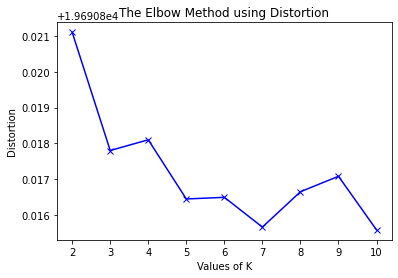

In [12]:
from matplotlib import pyplot as plt

plt.plot(range(2,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [13]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

0 : 1.0713470480654097
1 : 0.921935818239952
2 : 0.9348646702327856
3 : 0.8713747094355306
4 : 0.8845621295238361
5 : 0.847281412120737
6 : 0.8922471950208503
7 : 0.9032091761471126
8 : 0.8602797005578162


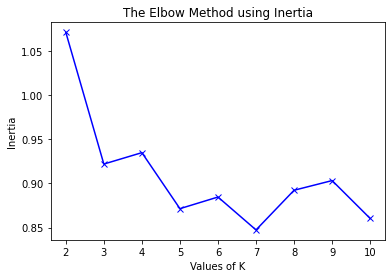

In [14]:
plt.plot(range(2,11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


Davies Bouldin score

In [15]:
from sklearn.metrics import davies_bouldin_score

davies_scores = []
for key, qkmeans_instance in enumerate(qkmeans_instances):
    davies_scores.append(davies_bouldin_score(X_train, qkmeans_instance.labels_))
    print(key,':',davies_scores[-1])

0 : 1.2724330506156099
1 : 3.291721369847315
2 : 3.1942867105069124
3 : 4.9981271207974105
4 : 3.60476949774962
5 : 4.287520734556528
6 : 6.066636146491428
7 : 2.4674347957245013
8 : 9.583640151001008


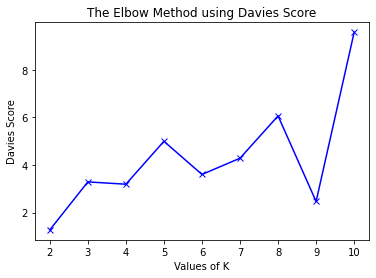

In [16]:
plt.plot(range(2,11), np.array(davies_scores), 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Davies Score')
plt.title('The Elbow Method using Davies Score')
plt.show()

Calinski Harabasz score

In [17]:
from sklearn.metrics import calinski_harabasz_score

calinski_scores = []
for key, qkmeans_instance in enumerate(qkmeans_instances):
    calinski_scores.append(calinski_harabasz_score(X_train, qkmeans_instance.labels_))
    print(key,':',calinski_scores[-1])

0 : 89.27727229020265
1 : 34.87635971858271
2 : 37.75825872352405
3 : 22.612096486452074
4 : 22.793955989511065
5 : 21.28075422432193
6 : 21.081305162974086
7 : 26.924587939503073
8 : 15.096629707908862


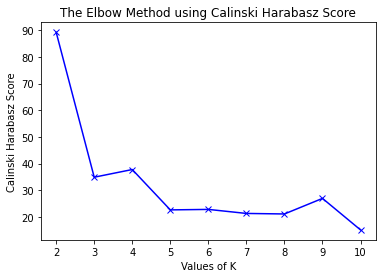

In [18]:
plt.plot(range(2,11), calinski_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Calinski Harabasz Score')
plt.title('The Elbow Method using Calinski Harabasz Score')
plt.show()

Silhouette score

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for key, qkmeans_instance in enumerate(qkmeans_instances):
    silhouette_scores.append(silhouette_score(X_train, qkmeans_instance.labels_, metric='euclidean'))
    print(key,':',silhouette_scores[-1])

0 : 0.17051433963586785
1 : -0.08146928256451194
2 : -0.0724121431211912
3 : -0.1594558949974415
4 : -0.21030182987051338
5 : -0.20360626012164135
6 : -0.14565074671276348
7 : -0.17182260919535108
8 : -0.197725740046469


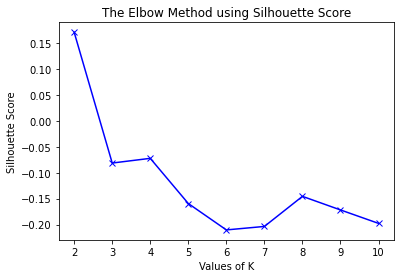

In [20]:
plt.plot(range(2,11), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Elbow Method using Silhouette Score')
plt.show()

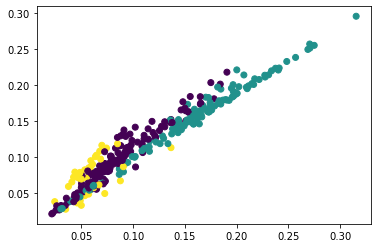

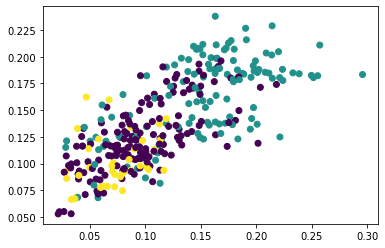

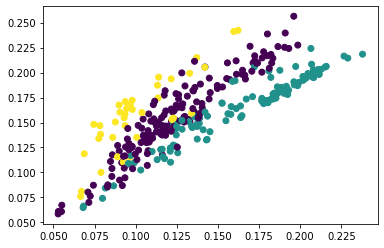

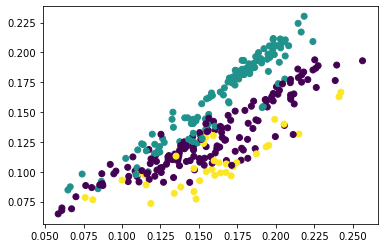

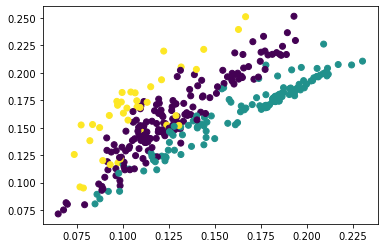

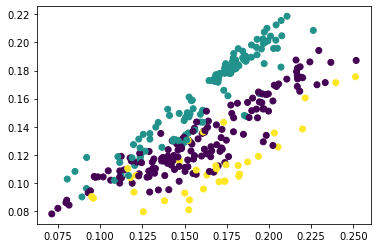

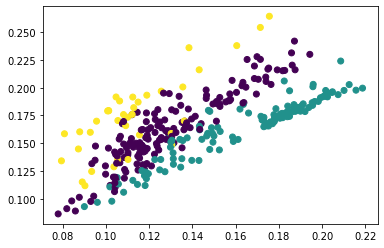

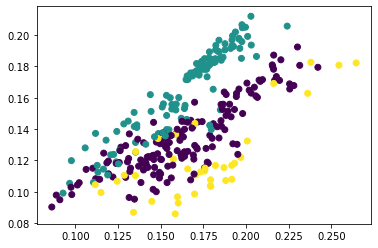

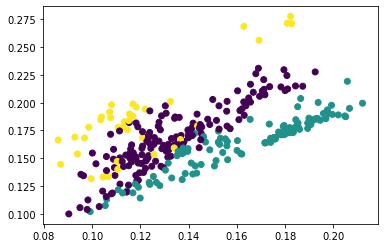

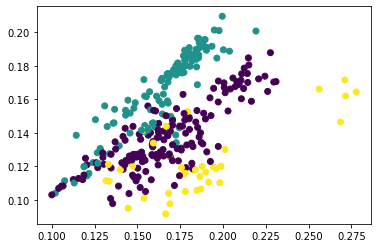

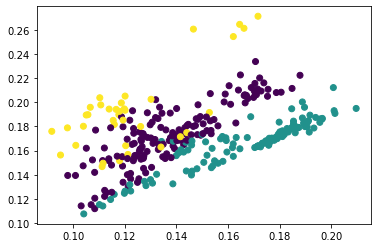

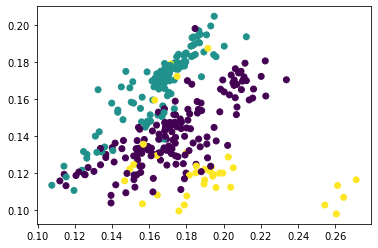

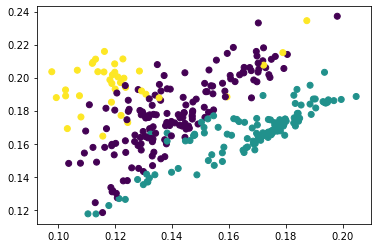

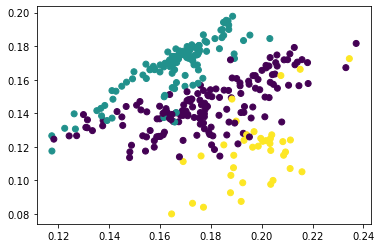

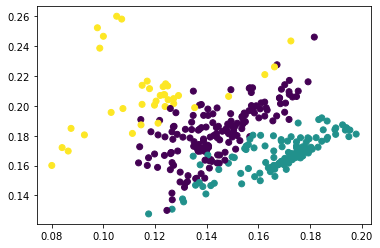

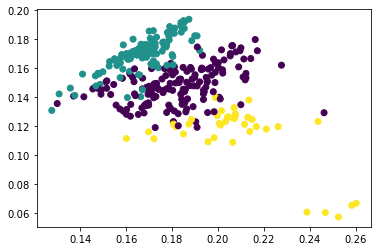

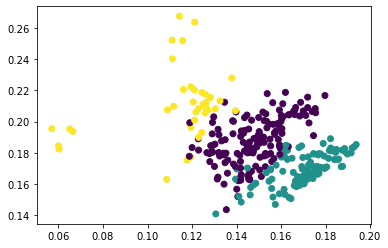

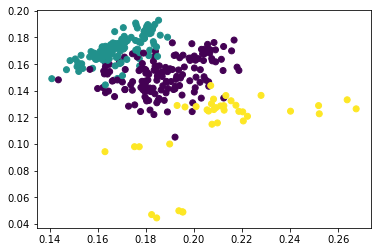

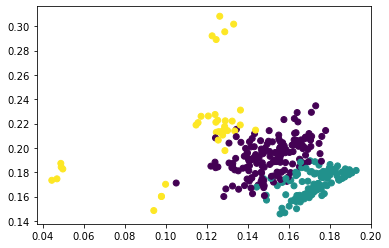

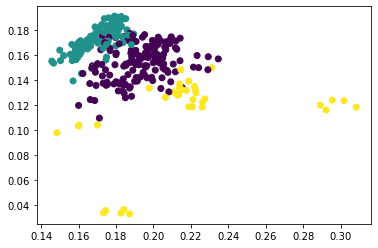

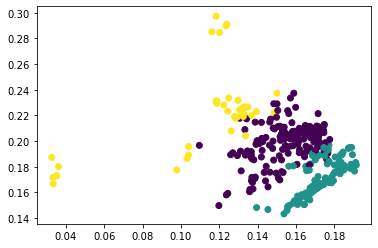

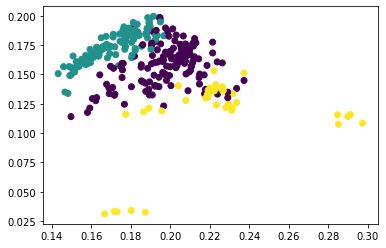

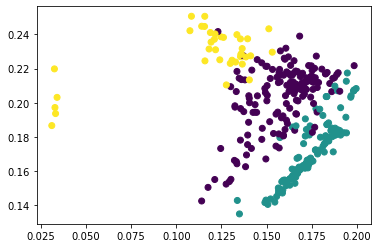

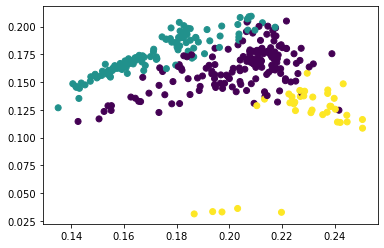

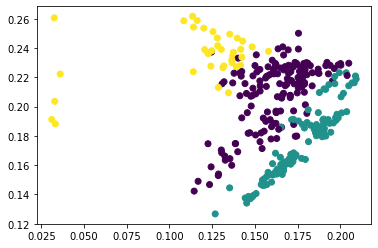

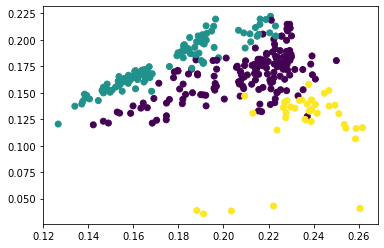

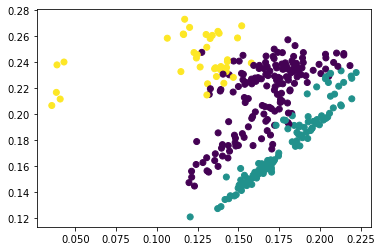

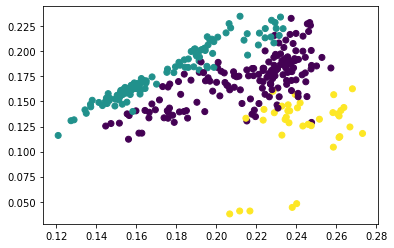

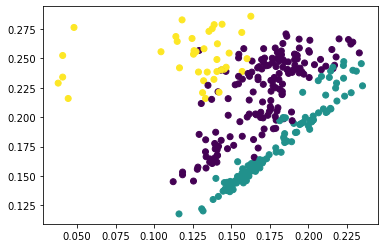

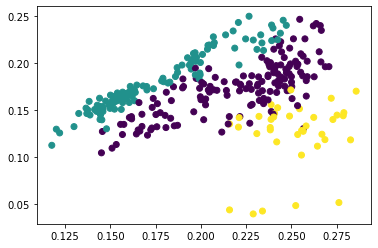

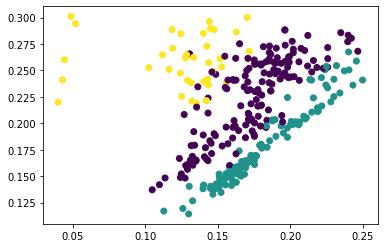

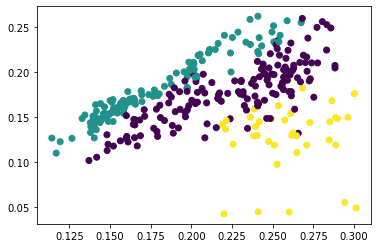

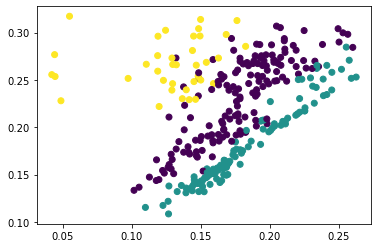

In [21]:
from matplotlib import pyplot as plt
for i in range(X_train.shape[1]-1):
    plt.scatter(preprocess(pd.DataFrame(data=X_train),map_type='probability')[:,i],preprocess(pd.DataFrame(data=X_train),map_type='probability')[:,i+1],c=qkmeans_instances[1].labels_)
    plt.show()

In [3]:
import sys
sys.path.append("..")

from quantum_k_means_1 import *

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [36]:
from qiskit.compiler import transpile
circuit = QuantumCircuit(32)
circuit.initialize(new_x,[i for i in range(6)])
circuit.initialize(new_y,[i for i in range(6)])
transpiled_circuit = transpile(circuit, basis_gates=['sx','x','cx','rz','id']).decompose()

In [38]:
transpiled_circuit.depth()

1169

In [40]:
transpiled_circuit.draw()

global phase: -801.874846411077
      ┌───────┐┌─────┐┌───┐┌─────┐┌──────────────────────┐┌─────┐┌───┐┌─────┐»
 q_0: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(4.43518725468010) ├┤ SDG ├┤ H ├┤ SDG ├»
      ├───────┤├─────┤├───┤├─────┤├──────────────────────┤├─────┤├───┤├─────┤»
 q_1: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(4.00389917242909) ├┤ SDG ├┤ H ├┤ SDG ├»
      ├───────┤├─────┤├───┤├─────┤├──────────────────────┤├─────┤├───┤├─────┤»
 q_2: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(3.97984080878062) ├┤ SDG ├┤ H ├┤ SDG ├»
      ├───────┤├─────┤├───┤├─────┤├──────────────────────┤├─────┤├───┤├─────┤»
 q_3: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(4.04847836110225) ├┤ SDG ├┤ H ├┤ SDG ├»
      ├───────┤├─────┤├───┤├─────┤├──────────────────────┤├─────┤├───┤├─────┤»
 q_4: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(3.89050302782448) ├┤ SDG ├┤ H ├┤ SDG ├»
      ├───────┤├─────┤├───┤├─────┤├──────────────────────┤├─────┤├───┤├─────┤»
 q_5: ┤ U1(0) ├┤ SDG ├┤ H ├┤ SDG ├┤ U1(3.61223868426207) ├┤ SDG ├┤ H ├┤ SDG ├»
      └───────┘└─────┘└───┘└─────┘└──────────────────────┘└─────┘└───┘└─────┘»
 q_6: ───────────────────────────────────────────────────────────────────────»
                                                                             »
 q_7: ───────────────────────────────────────────────────────────────────────»
                                                                             »
 q_8: ───────────────────────────────────────────────────────────────────────»
                                                                             »
 q_9: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_10: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_11: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_12: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_13: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_14: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_15: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_16: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_17: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_18: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_19: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_20: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_21: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_22: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_23: ───────────────────────────────────────────────────────────────────────»
                                                                             »
q_24: ───────────────────────────────────────────────────────────────────────»
                  

In [21]:
X_processed = preprocess(X_train, map_type='probability')
x = X_processed[0]
new_x = np.empty(64)
new_x[:x.shape[0]] = x
new_x

array([0.0569954 , 0.0488532 , 0.11399079, 0.19541279, 0.12213299,
       0.21983939, 0.13841739, 0.23612378, 0.16284399, 0.26869258,
       0.14655959, 0.26055038, 0.09770639, 0.20355499, 0.09770639,
       0.25240818, 0.0569954 , 0.19541279, 0.0488532 , 0.18727059,
       0.0325688 , 0.18727059, 0.0325688 , 0.21983939, 0.0325688 ,
       0.26055038, 0.040711  , 0.21169719, 0.040711  , 0.25240818,
       0.0488532 , 0.30126138, 0.0488532 , 0.22798159, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [22]:
y = X_processed[1]
y
new_y = np.empty(64)
new_y[:y.shape[0]] = y
new_y

array([0.03939813, 0.03889815, 0.06834675, 0.06634685, 0.08739585,
       0.08519595, 0.10819486, 0.10579497, 0.12804391, 0.12544404,
       0.14794297, 0.14499311, 0.16649209, 0.16309225, 0.17654161,
       0.17004192, 0.18554118, 0.17574165, 0.19069094, 0.17934148,
       0.1913909 , 0.18169137, 0.18764108, 0.18279131, 0.20084046,
       0.1956407 , 0.21278989, 0.20719015, 0.22343938, 0.21783965,
       0.23413887, 0.22863913, 0.24478837, 0.23938862, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [33]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy141')
backend = provider.get_backend('ibmq_qasm_simulator')
config = backend.configuration()
defaults = backend.defaults()

C:\Users\usuario\AppData\Roaming\Python\Python38\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-06-02 10:43:36,971: Credentials are already in use. The existing account in the session will be replaced.


In [34]:
dir(config)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 'backend_name',
 'backend_version',
 'basis_gates',
 'conditional',
 'coupling_map',
 'dynamic_reprate_enabled',
 'from_dict',
 'gates',
 'local',
 'max_experiments',
 'max_shots',
 'memory',
 'n_qubits',
 'num_qubits',
 'online_date',
 'open_pulse',
 'simulator',
 'to_dict']

In [35]:
config.basis_gates

['u1',
 'u2',
 'u3',
 'u',
 'p',
 'r',
 'rx',
 'ry',
 'rz',
 'id',
 'x',
 'y',
 'z',
 'h',
 's',
 'sdg',
 'sx',
 't',
 'tdg',
 'swap',
 'cx',
 'cy',
 'cz',
 'csx',
 'cp',
 'cu1',
 'cu2',
 'cu3',
 'rxx',
 'ryy',
 'rzz',
 'rzx',
 'ccx',
 'cswap',
 'mcx',
 'mcy',
 'mcz',
 'mcsx',
 'mcp',
 'mcu1',
 'mcu2',
 'mcu3',
 'mcrx',
 'mcry',
 'mcrz',
 'mcr',
 'mcswap',
 'unitary',
 'diagonal',
 'multiplexer',
 'initialize',
 'kraus',
 'roerror',
 'delay']